In [244]:
import openmc
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import sys
import matplotlib.pyplot as plt
from copy import deepcopy
from matplotlib.colors import LogNorm

CWD = Path.cwd().resolve()
project_root = Path.cwd().parents[3]
sys.path.append(str(project_root))
from src.utils.common.isotope import *

In [245]:
uranium = Radionuclide_lara("U-235")


In [246]:
time_bins = np.logspace(0, 18, 100)

time_bins = np.linspace(0, 1e17, 100)
mass_bins = np.logspace(0, 3, 50)
mass_bins = np.linspace(1, 1e3, 100)

In [247]:

activity_uranium = np.zeros((len(time_bins), len(mass_bins)))
for i, time in enumerate(time_bins):
    for j, mass in enumerate(mass_bins):
        activity_uranium[i, j] = uranium.get_activity_after_time(mass=mass, time=time)

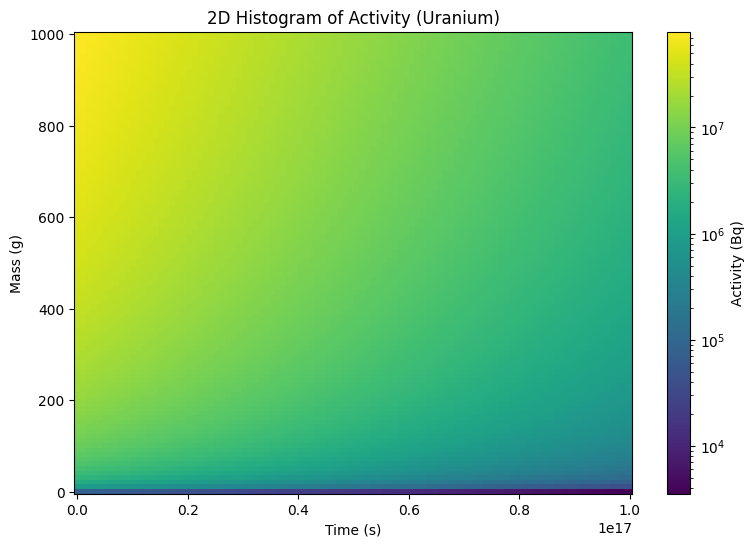

In [248]:
masked_activity = np.ma.masked_where(activity_uranium <= 0, activity_uranium)
plt.figure(figsize=(9, 6))
pcm = plt.pcolormesh(
    time_bins, mass_bins, masked_activity.T,
    norm=LogNorm(vmin=masked_activity.min(), vmax=masked_activity.max()),
    shading='auto'
)
plt.colorbar(pcm, label='Activity (Bq)')
plt.xlabel('Time (s)')
plt.ylabel('Mass (g)')
plt.title('2D Histogram of Activity (Uranium)')
plt.show()

In [249]:
import plotly.graph_objects as go

fig = go.Figure(
    data=go.Heatmap(
        x=time_bins,
        y=mass_bins,
        z=activity_uranium.T,  # transpose to match axes
        colorscale='Viridis',
        colorbar=dict(title='Activity [Bq]'),
        zmin=np.min(activity_uranium[activity_uranium > 0]),
        zmax=np.max(activity_uranium),
        zsmooth='best'
    )
)
fig.update_layout(
    xaxis_type='linear',
    yaxis_type='linear',
    xaxis_title='Time [s]',
    yaxis_title='Mass [g]',
    title='2D Histogram of Activity (Uranium)',
    width=800,
    height=700
)
fig.show()

In [250]:
# For an easy-to-read 2D histogram, use logarithmic spacing for both axes to cover a wide range of values.
# Example points for time (in seconds) and mass (in grams):

# Time points: from 1 second to 1e8 seconds (about 3 years), logarithmically spaced
time_points = np.logspace(0, 8, 50)

# Mass points: from 1 gram to 1000 grams, logarithmically spaced
mass_points = np.logspace(0, 3, 50)

# These points will give a good overview of the activity evolution over a wide range of conditions.
print("Suggested time points:", time_points)
print("Suggested mass points:", mass_points)

Suggested time points: [1.00000000e+00 1.45634848e+00 2.12095089e+00 3.08884360e+00
 4.49843267e+00 6.55128557e+00 9.54095476e+00 1.38949549e+01
 2.02358965e+01 2.94705170e+01 4.29193426e+01 6.25055193e+01
 9.10298178e+01 1.32571137e+02 1.93069773e+02 2.81176870e+02
 4.09491506e+02 5.96362332e+02 8.68511374e+02 1.26485522e+03
 1.84206997e+03 2.68269580e+03 3.90693994e+03 5.68986603e+03
 8.28642773e+03 1.20679264e+04 1.75751062e+04 2.55954792e+04
 3.72759372e+04 5.42867544e+04 7.90604321e+04 1.15139540e+05
 1.67683294e+05 2.44205309e+05 3.55648031e+05 5.17947468e+05
 7.54312006e+05 1.09854114e+06 1.59985872e+06 2.32995181e+06
 3.39322177e+06 4.94171336e+06 7.19685673e+06 1.04811313e+07
 1.52641797e+07 2.22299648e+07 3.23745754e+07 4.71486636e+07
 6.86648845e+07 1.00000000e+08]
Suggested mass points: [   1.            1.1513954     1.32571137    1.52641797    1.75751062
    2.02358965    2.32995181    2.6826958     3.0888436     3.55648031
    4.09491506    4.71486636    5.42867544    6.